<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/3ekstraksi_dan_klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import

In [1]:
import pandas as pd
import numpy as np
import gensim
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import word2vec

load file

In [24]:
url1 = 'https://raw.githubusercontent.com/alfinmaulani/skripsi/master/dataisear(preputama).csv'
url2 = 'tba'
df = pd.read_csv(url1)

model1 = gensim.models.word2vec.Word2Vec.load('https://github.com/alfinmaulani/skripsi/blob/master/w2v(preputama).model?raw=true')
# model2 = glove
# modelsem = copyan
model = model1

In [3]:
df.head()
df.emosi

0           joy
1          fear
2         anger
3       sadness
4       disgust
         ...   
7511      shame
7512      shame
7513       fear
7514      guilt
7515       fear
Name: emosi, Length: 7516, dtype: object

In [4]:
cek=model.wv

# (untuk melihat trained word) 
# model.wv.index2word
# melihat fitur kata tertentu
# model.wv["moment"]
# melihat berapa banyak fitur
model.wv.vector_size

100

sanity check

In [5]:
#similiar word
cek.similar_by_word("me")

[('him', 0.9490288496017456),
 ('her', 0.920747697353363),
 ('them', 0.9087375998497009),
 ('someone', 0.9031859636306763),
 ('money', 0.8635905981063843),
 ('lie', 0.8608999252319336),
 ('us', 0.8513822555541992),
 ('lies', 0.8486075401306152),
 ('care', 0.8485527634620667),
 ('something', 0.847903847694397)]

In [6]:
#higher order visualitation

In [ ]:
import sklearn.datasets
!pip install umap-learn[plot]

import plotly.express as px

In [8]:
from umap import UMAP

x = UMAP().fit_transform(cek.vectors)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



In [9]:
vis=pd.DataFrame(x, columns=["Umap1","Umap2"])
vis["dokumen"]=cek.index2word

In [10]:
vis

,Umap1,Umap2,dokumen
0,-3.429207,4.092277,i
1,-4.639009,2.299884,the
2,-4.343080,3.146177,a
3,-2.946272,3.820988,to
4,-4.160423,3.148276,my
...,...,...,...
9347,12.030147,7.710842,timetable
9348,10.720516,10.137215,timidity
9349,11.167192,12.562436,imcompetent
9350,10.010450,10.572796,step


In [11]:
fig= px.scatter(vis,x="Umap1",y="Umap2",text="dokumen")
fig.update_traces(textposition='top center')
fig.update_layout(height=800,title_text='Reduce Word2Vec Visuallization')
fig.show()

average base ekstraksi fitur

In [12]:
def eksfit(sentence, model):
  vec = [model[word] for word in word_tokenize(sentence)]
  sent_vec = np.mean(vec, axis=0)
  return sent_vec

In [13]:
nltk.download('punkt')
has_vec=[eksfit(sentences,model) for sentences in df.dokumen]
has_vec=np.array(has_vec)
has_vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



array([[-0.18726695,  0.36796972, -0.02042252, ...,  0.03199443,
         0.30877665, -0.43655598],
       [-0.07625942,  0.29166913,  0.00913435, ..., -0.01660508,
         0.25690183, -0.4218843 ],
       [-0.10427458,  0.2711007 , -0.04194504, ..., -0.00115532,
         0.17439105, -0.40717772],
       ...,
       [-0.2008625 ,  0.28333536, -0.01538002, ..., -0.00140981,
         0.26261058, -0.35942766],
       [-0.04849462,  0.23790592, -0.01900194, ..., -0.06727868,
         0.1996061 , -0.51425785],
       [-0.11968565,  0.3158777 , -0.08209749, ..., -0.04217695,
         0.27622005, -0.4772691 ]], dtype=float32)

In [14]:
has_vec.shape

(7516, 100)

In [15]:
X=has_vec
y=df.emosi
print(X.shape)
print(y.shape)
print(X)
print(y)

(7516, 100)
(7516,)
[[-0.18726695  0.36796972 -0.02042252 ...  0.03199443  0.30877665
  -0.43655598]
 [-0.07625942  0.29166913  0.00913435 ... -0.01660508  0.25690183
  -0.4218843 ]
 [-0.10427458  0.2711007  -0.04194504 ... -0.00115532  0.17439105
  -0.40717772]
 ...
 [-0.2008625   0.28333536 -0.01538002 ... -0.00140981  0.26261058
  -0.35942766]
 [-0.04849462  0.23790592 -0.01900194 ... -0.06727868  0.1996061
  -0.51425785]
 [-0.11968565  0.3158777  -0.08209749 ... -0.04217695  0.27622005
  -0.4772691 ]]
0           joy
1          fear
2         anger
3       sadness
4       disgust
         ...   
7511      shame
7512      shame
7513       fear
7514      guilt
7515       fear
Name: emosi, Length: 7516, dtype: object


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [17]:
clf = svm.SVC(kernel='poly', decision_function_shape='ovr')
# clf.kernel
scores = cross_val_score(clf, X, y, cv=10)
scores.mean()

0.3165261920276511

conf mat cara 1

In [18]:
y_pred = cross_val_predict(clf, X, y, cv=10)

In [19]:
conf_mat = confusion_matrix(y, y_pred)
conf_mat

array([[324, 295, 133, 138,  74,  60,  55],
       [166, 503, 154,  77,  67,  50,  49],
       [107, 245, 462,  69,  93,  32,  68],
       [206, 161, 122, 293,  89,  57, 122],
       [141, 210, 177,  89, 346,  64,  65],
       [184, 156,  97, 132, 143, 299,  71],
       [168, 221, 169, 202, 104,  55, 152]])

In [ ]:
# !pip install jcopml
# from jcopml.plot import plot_confusion_matrix

In [20]:
accuracy_score(y, y_pred)

0.31652474720596063

conf mat cara 2

In [21]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

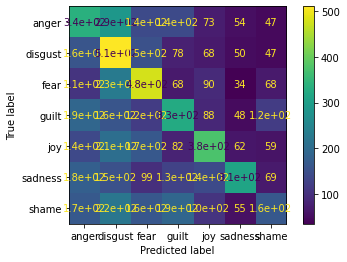

In [22]:
clf.fit(X, y)
plot_confusion_matrix(clf, X, y)
plt.show()